# Effective Python 1章

文字列処理
- バイトかstrか分からない場合にstrを常に返す関数

In [5]:
def to_str(bytes_or_str):
    if isinnstance(bytes_or_str, bytes):
        value = bytes_or_str.decode('utf-8')
    else:
        value = bytes_or_str
    return value

文字列処理
- byteかstrか分からない場合にbyteを常に返す関数

In [7]:
def to_bytes(bytes_or_str):
    if isinnstance(bytes_or_str, bytes):
        value = bytes_or_str.encode('utf-8')
    else:
        value = bytes_or_str
    return value

# 複雑な式はヘルパー関数に変更する

In [12]:
from urllib.parse import parse_qs
my_values = parse_qs('red=5&blue=0&green=', keep_blank_values=True)
print(repr(my_values))

def get_first_int(values, key, default=0):
    found = values.get(key, [''])
    if found[0]:
        found = int(found[0])
    else:
        found = default
    return found

print('Red: %r' % get_first_int(my_values, 'red'))
print('Green: %r' % get_first_int(my_values, 'green'))

{'blue': ['0'], 'red': ['5'], 'green': ['']}
Red: 5
Green: 0


# シーケンス処理の方法

In [15]:
a = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
print('First four:', a[:4])
print('Last four:', a[-4:])
print('Middle two:', a[3:-3])
print(a[::2])
print(a[1::2])

First four: ['a', 'b', 'c', 'd']
Last four: ['e', 'f', 'g', 'h']
Middle two: ['d', 'e']
['a', 'c', 'e', 'g']
['b', 'd', 'f', 'h']


# mapやfilterの代わりにリスト内包表記を使用

In [21]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
squares = [x**2 for x in a]
print(squares)
even_square = [x**2 for x in a if x % 2 == 0]
print(even_square)

chile_rank = {'ghost':1, 'habanero':2, 'cayenne':3}
rank_dict = {rank: name for name, rank in chile_rank.items()}
chile_len_set = {len(name) for name in rank_dict.values()}
print(rank_dict)
print(chile_len_set)

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
flat = [x for row in matrix for x in row]
print(flat)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[4, 16, 36, 64, 100]
{1: 'ghost', 2: 'habanero', 3: 'cayenne'}
{8, 5, 7}
[1, 2, 3, 4, 5, 6, 7, 8, 9]


# 大きなデータにはジェネレータ式

- リスト内包表記は膨大なデータを扱う場合はメモリを食うのでジェネレータ式を使用する方が良い
- ファイル入出力
- HTML処理などがあげられる

In [26]:
str_list = ['a', 'ab', 'abc']
it = (len(x) for x in str_list)
roots = ((x, x**0.5) for x in it)
print(next(roots))
print(next(roots))
print(next(it))

(1, 1.0)
(2, 1.4142135623730951)
3


# rangeよりenumerate

- 自然にかけるため

In [30]:
for i, charactor in enumerate(str_list):
    print('%d: %s' % (i + 1, charactor))

1: a
2: ab
3: abc


# イテレータを並列にするならzip

- 配列の長さの同一性に確信を持てない場合はitertoolsのzip_longest関数を使用する

In [31]:
letters = [len(n) for n in str_list]

for name, count in zip(str_list, letters):
    print(name)
    print(count)

a
1
ab
2
abc
3


In [40]:
import json
UNDEFINED = object()

def divide_json(path):
    handle = open(path, 'r+')
    try:
        data = handle.read()
        op = json.loads(data)
        value = (op['numerator'] / op['denominator'])
    except ZeroDivisionError as e:
        return UNDEFINED
    else:
        op['result'] = value
        result = json.dumps(op)
        handle.seek(0)
        handle.write(result)
        return value
    finally:
        handle.close()

divide_json('./test.json')

0.5

- 例として描画用のデータを設定している
- `%matplotlib inline`でノートブック内で値を描画している

In [2]:
img = imread('PAKssss0I9A3752_TP_V.jpeg')

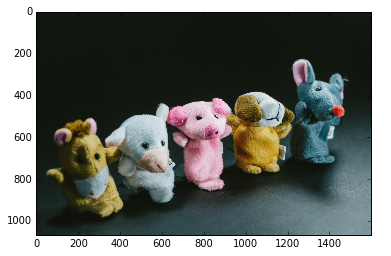

In [3]:
plt.imshow(img)

In [6]:
plt.show()